In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\LENOVO\Desktop\ds.xlsx",sheet_name="ds")
print(df)

     S.No    District                        Name Of The School  \
0       1    Namakkal                    Government High School   
1       2    Namakkal         Government High School Marurpatti   
2       3    Namakkal  Government Girls Higher Secondary School   
3       4    Namakkal        Government Higher Secondary School   
4       5    Namakkal  Government Girls Higher Secondary School   
..    ...         ...                                       ...   
530   531  Thiruvarur        Government Higher Secondary School   
531   532  Thiruvarur                    Government High School   
532   533  Thiruvarur              Govt Higher Secondary School   
533   534  Thiruvarur              Government Elementary School   
534   535  Thiruvarur            Govt. Hr. Sec school pulivalam   

                                 Address Of The School          Subject1  \
0                   Public service & government agency           Physics   
1     Public service & government agency\nM

In [3]:
df.head(10)

,S.No,District,Name Of The School,Address Of The School,Subject1,Subject2,Vacancy,Qualification
0,1,Namakkal,Government High School,Public service & government agency,Physics,Physics,Yes,M.Sc
1,2,Namakkal,Government High School Marurpatti,Public service & government agency\nMarurpatt...,English,Tamil,Yes,B.Sc
2,3,Namakkal,Government Girls Higher Secondary School,"Public service & government agency, Education\...",Physics,Tamil,No,B.Sc B.Ed
3,4,Namakkal,Government Higher Secondary School,"Public service & government agency, High schoo...",Computer Science,Tamil,Yes,B.Sc B.Ed
4,5,Namakkal,Government Girls Higher Secondary School,High school\nSentha Mangalam Main Road Kalappa...,Maths,Chemistry,No,B.Sc B.Ed
5,6,Ariyalur,Government High School Nallamapalayam,"High school\nNallampalayam, Ariyalur",Biology,Biology,No,M.Sc B.Ed
6,7,Ariyalur,Government High School Siruvalur,"1st Cross Street, Ariyalur",Chemistry,Chemistry,No,M.Sc
7,8,Ariyalur,Government Higher Secondary School,"High school\nSh27, Perambalur Ariyalur Road, K...",English,English,No,B.Sc
8,9,Ariyalur,Government High School Paranam,"Education\nParanam, Udayarpalayam",Physics,Maths,Yes,B.Sc B.Ed
9,10,Chengalpattu,Government High School Oragadam,"Oragadam, Chengalpattu",Physics,Maths,Yes,M.Sc


In [4]:
df.columns


Index(['S.No', 'District', 'Name Of The School', 'Address Of The School',
       'Subject1', 'Subject2', 'Vacancy', 'Qualification'],
      dtype='object')

In [5]:
df.shape


(535, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   S.No                   535 non-null    int64 
 1   District               531 non-null    object
 2   Name Of The School     535 non-null    object
 3   Address Of The School  535 non-null    object
 4   Subject1               535 non-null    object
 5   Subject2               535 non-null    object
 6   Vacancy                535 non-null    object
 7   Qualification          535 non-null    object
dtypes: int64(1), object(7)
memory usage: 33.6+ KB


# ANALYZING CATEGORICAL VARIABLES

In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 7 categorical variables
The categorical variables are : ['District', 'Name Of The School', 'Address Of The School', 'Subject1', 'Subject2', 'Vacancy', 'Qualification']


# CHECKING NULL VALUES

In [8]:
df[categorical].isnull().sum()

District                 4
Name Of The School       0
Address Of The School    0
Subject1                 0
Subject2                 0
Vacancy                  0
Qualification            0
dtype: int64

# Frequency count of variables in categorical variables

In [9]:
for var in categorical: 
    print(df[var].value_counts())
    print(df[var].value_counts()/np.float(len(df)))
    print()


Madurai         35
Tirunelveli     35
Thoothukudi     35
Thanjavur       35
Erode           31
Coimbatore      30
Kancheepuram    30
Karur           30
Salem           30
Kanyakumari     30
Nagapatinam     25
Theni           25
Namakkal        25
Dharamapuri     25
Cuddalore       25
Thiruvarur      25
Ariyalur        20
Tenkasi         20
Chengalpattu    15
Dindigul         5
Name: District, dtype: int64
Madurai         0.065421
Tirunelveli     0.065421
Thoothukudi     0.065421
Thanjavur       0.065421
Erode           0.057944
Coimbatore      0.056075
Kancheepuram    0.056075
Karur           0.056075
Salem           0.056075
Kanyakumari     0.056075
Nagapatinam     0.046729
Theni           0.046729
Namakkal        0.046729
Dharamapuri     0.046729
Cuddalore       0.046729
Thiruvarur      0.046729
Ariyalur        0.037383
Tenkasi         0.037383
Chengalpattu    0.028037
Dindigul        0.009346
Name: District, dtype: float64

Government Higher Secondary School          100
Government 

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_3808/306681985.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


# check for cardinality in categorical variables

In [10]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

District  contains  21  labels
Name Of The School  contains  68  labels
Address Of The School  contains  107  labels
Subject1  contains  7  labels
Subject2  contains  7  labels
Vacancy  contains  2  labels
Qualification  contains  4  labels


# LABEL ENCODING

In [11]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['District'] = label_encoder.fit_transform(df['District'])
df['Subject1'] = label_encoder.fit_transform(df['Subject1'])
df['Subject2'] = label_encoder.fit_transform(df['Subject2'])
df['Vacancy'] = label_encoder.fit_transform(df['Vacancy'])
df['Qualification'] = label_encoder.fit_transform(df['Qualification'])
 
df.head()

,S.No,District,Name Of The School,Address Of The School,Subject1,Subject2,Vacancy,Qualification
0,1,12,Government High School,Public service & government agency,5,5,1,2
1,2,12,Government High School Marurpatti,Public service & government agency\nMarurpatt...,3,6,1,0
2,3,12,Government Girls Higher Secondary School,"Public service & government agency, Education\...",5,6,0,1
3,4,12,Government Higher Secondary School,"Public service & government agency, High schoo...",2,6,1,1
4,5,12,Government Girls Higher Secondary School,High school\nSentha Mangalam Main Road Kalappa...,4,1,0,1


# TRAIN TEST SPLIT

In [12]:
X = df.drop(['Vacancy','Name Of The School','Address Of The School','S.No','Name Of The School'], axis=1)
y = df['Vacancy']

In [13]:
print(X)

     District  Subject1  Subject2  Qualification
0          12         5         5              2
1          12         3         6              0
2          12         5         6              1
3          12         2         6              1
4          12         4         1              1
..        ...       ...       ...            ...
530        17         4         6              1
531        17         0         3              3
532        17         6         4              0
533        17         3         4              2
534        17         4         2              2

[535 rows x 4 columns]


In [14]:
print(y)

0      1
1      1
2      0
3      1
4      0
      ..
530    0
531    0
532    1
533    1
534    1
Name: Vacancy, Length: 535, dtype: int32


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)
X_train.shape, X_test.shape

((428, 4), (107, 4))

# DECISION TREE

In [46]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [47]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)



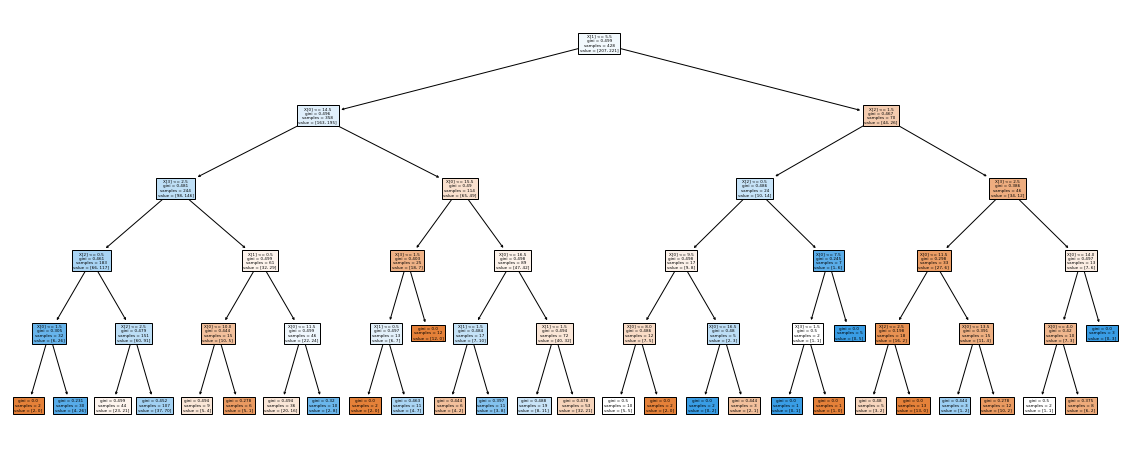

In [48]:
# Plot the Decision Tree
plt.figure(figsize=(20, 8))
plot_tree(dtc, filled=True)
plt.show()

In [49]:
inp=[[17,4,6,1]]
y_pred8=dtc.predict(inp)
if y_pred8==1:
    print("Yes")
else:
    print("No")

No


In [50]:
import pickle

# Train your model
dtc.fit(X_train, y_train)

# Save your model to a file
with open('rebe.pkl', 'wb') as file:
    pickle.dump(dtc, file)

In [51]:
import pickle
with open('rebe.pkl', 'rb') as file:
    model = pickle.load(file)
    
inp=[[12,5,5,2]]
y_pred8=dtc.predict(inp)

    # Use the model to make predictions
print(y_pred8)

[1]


In [26]:
df['District'].unique()

array([12,  0,  1,  2,  3,  4,  5,  6, 20,  7,  9, 10,  8, 11, 13, 14, 15,
       16, 18, 19, 17])

In [29]:
df['encoded'] = label_encoder.fit_transform(df['District'].values)

In [30]:
ds=df['District']

In [31]:
ds

0      12
1      12
2      12
3      12
4      12
       ..
530    17
531    17
532    17
533    17
534    17
Name: District, Length: 535, dtype: int32

In [32]:
gf=df['Subject1']
gf

0      5
1      3
2      5
3      2
4      4
      ..
530    4
531    0
532    6
533    3
534    4
Name: Subject1, Length: 535, dtype: int32

In [33]:
bf=df['Qualification']
bf

0      2
1      0
2      1
3      1
4      1
      ..
530    1
531    3
532    0
533    2
534    2
Name: Qualification, Length: 535, dtype: int32